# Case 01：纸牌游戏的获胜概率

Case 01游戏规则：

> 52张纸牌、一半红牌一半黑牌。</br>
> 每一轮游戏中：</br>
> (1) 洗牌，洗牌之后牌背面向上</br>
> (2) 对方一次翻开一张牌，我方可以决定是否停止。</br>
> (3) 当我方喊停后，对方最后一次翻牌：翻开的牌是红色，我方赢1美元；翻开的牌是黑色，我方输1美元。</br>
> 结算筹码后游戏进入下一轮</br>

该游戏可以玩任意多轮，我方的最佳策略是什么？

Case 01 共包含4个章节，对应于书中的4章

1 使用采样空间分析来计算观察事件的概率

> Compute the probabilities of observable events using sample space analysis.

2 概率可视化

> Plot the probabilities of events across a range of interval values (区间值).

3 使用Python模拟随机事件

> Simulate random processes, such as coin-flips and card shuffling, using Python.

4 估算模拟事件的置信区间

> Evaluate our confidence in decisions drawn from simulations using confidence interval analysis.


# 1. Computing Probabilities Using Python

> 使用`概率论`在不确定性中寻找可预测的事件

## 1.1. Sample Space Analysis: An Equation-Free Approach for Measuring Uncertainty in Outcomes

A coin-flip will produce one of 2 measurable outcomes: `'Heads'` or `'Tails'`. By storing outcomes in a Python set, we can create a **sample space** of coin-flips.

> `样本空间（sample space）`：样本所有可能的取值。以`抛硬币`为例，采样空间包括了`正面向上`、`背面向上`<br/>

**Listing 1. 1. Creating a Sample Space of Coin-Flips**

In [1]:
sample_space = {'Heads', 'Tails'}

Suppose we choose an element of sample_space at random. All outcomes within `sample_space` share an identical probability, which is equal to `1 / len(sample_space)`.

> 假定抛硬币结果是无偏的，那么`正面向上`，`背面向上`的概率都是相等的

**Listing 1. 2. Computing the probability of heads**

> 计算`正面向上`的概率

In [2]:
probability_heads = 1 / len(sample_space)
print(f'Probability of choosing heads is {probability_heads}')

Probability of choosing heads is 0.5


**Listing 1. 3  & 1.4. Defining event conditions, Defining additioning event conditions**

The probability of choosing `'Heads'` equals 0.5. What is the probability that the coin lands on either heads or on
tails? To find rigorous answers, we’ll need to define the
concept of an **event**. An event is the subset of those elements within sample_space that
satisfy some event condition. An **event condition** is a simple Boolean function whose input
is a single sample_space element. 

> 下面列出所有的4种`事件条件`（`Event Condition`）判断函数
> * 正面向上或背面向上
> * 既不是正面向上、也不是背面向上
> * 正面向上
> * 背面向上

In [3]:
def is_heads_or_tails(outcome):  return outcome in {'Heads', 'Tails'}
def is_neither(outcome): return not is_heads_or_tails(outcome)
def is_heads(outcome): return outcome == 'Heads'
def is_tails(outcome): return outcome == 'Tails'

**Listing 1. 5. Defining an event detection function**
We can pass event conditions into a generalized `get_events function`. The
function iterates through `generic_sample_space` and returns the set of outcomes where
`event_condition(outcome)` is `True`.

> 定义函数`get_event`，用来一个样本，会满足哪些`事件条件`

In [4]:
def get_event(event_condition, generic_sample_space):
    return set([outcome for outcome in generic_sample_space 
                if event_condition(outcome)])

**Listing 1. 6. Detecting events using event conditions**

Lets execute get_event on our 4 event conditions.

> 执行上面的函数，计算`采样空间`的哪些取值，会满足指定的`事件条件`

In [5]:
event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]

for event_condition in event_conditions: 
    print(f"Event Condition: {event_condition.__name__}")
    event = get_event(event_condition, sample_space)
    print(f'Event: {event}\n')

Event Condition: is_heads_or_tails
Event: {'Heads', 'Tails'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()



**Listing 1. 7. Computing event probabilities**

We’ve successfully extracted 4 events from `sample_space`. The probability of each event is equal to `len(event) / len(sample_space)`.

> 计算每个`事件条件`被满足的概率，

In [6]:
def compute_probability(event_condition, generic_sample_space):
    event = get_event(event_condition, generic_sample_space)
    return len(event) / len(generic_sample_space)

for event_condition in event_conditions: 
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.5
Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_neither' is 0.0


### 1.1.1. Analyzing a Biased Coin

**Listing 1. 8. Representing a weighted sample space**

Suppose a coin is 4 times more likely to land on heads relative to tails. We can represent that coin as a weighted sample space.

> 之前的章节，抛硬币事件是无偏的（正反面概率相同），现在假设其是有偏的，正面反面概率比例是4:1

In [7]:
weighted_sample_space = {'Heads': 4, 'Tails': 1}

**Listing 1. 9. Checking the weighted sample space size**

Our new sample space is stored within a dictionary. We can redefine sample-space size as the sum of all dictionary weights.

> 两个事件（正面、反面）的权重之和是5

In [8]:
sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5

**Listing 1. 10. Checking the weighted event size**

We can redefine event size in similar manner. Each event is a set of outcomes. These outcomes map to weights. Summing over these weights will yield the event size.

> 计算一个事件条件（Event Condition）所覆盖的事件（Event）的权重之和

In [9]:
event = get_event(is_heads_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

**Listing 1. 11. Defining a generalized event probability function**

Our generalized definitions of sample-space size and event size permit us to create a `compute_event_probability` function.

> 定义一个函数<b>`compute_event_probability`</b>，来计算一个 `事件条件`（`Event Condition`）被满足的概率：
>
> * 如果事件概率是无偏估计（`generic_sample_space`的类型为`set`），仍延续上一小节`compute_probability`的方法，即`满足条件的事件数`除以`总事件数`</br>
> * 如果事件概率是有偏估计（`generic_sample_space`的类型为`map`，value是权重），使用`满足条件事件的权重之和`除以`总事件权重之和`</br>
> 
> 这个函数是接下来章节的基础

In [10]:
def compute_event_probability(event_condition, generic_sample_space):
    event = get_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    
    event_size = sum(generic_sample_space[outcome] 
                     for outcome in event)
    return event_size / sum(generic_sample_space.values())

**Listing 1. 12. Computing weighted event probabilities**

We can now output all the event probabilities for the biased coin without needing to redefine our 4 event condition functions.

> 输出所有`事件条件`（Event Condition）被满足的概率

In [11]:
for event_condition in event_conditions: 
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.8
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.0


## 1.2. Computing Non-Trivial Probabilities

> 本节用上面在`事件`概率均等、或不均等的情况下，计算`事件条件`被满足概率的函数`compute_event_probability()`来分析几个更复杂的问题

### 1.2.1. Problem 1: Analyzing a Family with 4 Children
Suppose a family has 4 children. What is the probability that exactly 2 of the children are
boys? We’ll find solve this by constructing an unweighted sample space where each outcome is a 4-element tuple
representing one possible sequence of 4 children.

> 问题1：4个小孩，刚好有2个男孩的概率

**Listing 1. 13. Computing the sample space of children**

> 假设`样本空间`各个事件概率均等，下面的代码列出来四个小孩各种性别组合的发生的概率

In [12]:
# 代码由4重嵌套的循环组成
possible_children = ['Boy', 'Girl']
sample_space = set()
for child1 in possible_children:
    for child2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1, child2, child3, child4)
                sample_space.add(outcome)

**Listing 1. 14. Computing the sample space using `product`**

We ran 4 nested for-loops to explore the sequence of 4 births. This is not an efficient use of
code. We can more easily generate our sample space using Python’s build-in `itertools.product` function.

> 用`itertools`替代4重嵌套循环，得到相同的结果

In [13]:
# 用`itertools.product`替代4重嵌套循环，得到相同的结果
from itertools import product
all_combinations = product(*(4 * [possible_children]))
assert set(all_combinations) == sample_space

**Listing 1. 15. Passing `repeat` into `product`**

We can make our code even more efficient by executing `set(product(possible_children, repeat=4))`.

> 用更effiction的方法来使用`itertools.product`，得到相同的结果

In [14]:
# 用更effiction的方法来使用`itertools.product`，得到相同的结果
sample_space_efficient = set(product(possible_children, repeat=4))
assert sample_space == sample_space_efficient

Lets calculate the fraction of `sample_space` that is composed of families with 2 boys.

**Listing 1. 16. Computing the probability of 2 boys**

> 计算4个小孩中有2个是男孩的概率

In [15]:
# Event Condition：has_two_boys(outcome)，4个小孩中有2个是男孩的概率
# outcome：4个小孩的请别，是一个长度为4的数组
def has_two_boys(outcome): 
    return len([child for child in outcome if child == 'Boy']) == 2

# sample_space：4个小孩各种性别的组合，其中每一种组合都会传给`has_two_boys`来判断该组合是否满足`Event Condition`
prob = compute_event_probability(has_two_boys, sample_space)
print(f"Probability of 2 boys is {prob}")

Probability of 2 boys is 0.375


### 1.2.2. Problem 2: Analyzing Multiple Dice Rolls
Suppose a die is rolled 6 times. What is the probability that these 6 dice-rolls add up to 21? We’ll begin by defining the possible values of any single roll.

> 问题2：1个6面骰子，一共投掷6次，得到的总的点数和为21的概率

**Listing 1. 17. Defining all possible rolls of a six-sided die**

> 单次投掷的样本空间：[1,2,3,4,5,6]

In [16]:
possible_rolls = list(range(1, 7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


**Listing 1. 18. The sample space for 6 consecutive dice rolls**

Next, we’ll create the sample space for 6 consecutive rolls.

> 6次投掷的样本空间

In [17]:
sample_space = set(product(possible_rolls, repeat=6))

**Listing 1. 19. Computing the probability of a dice-roll sum**

Finally, we’ll define a has_sum_of_21 event condition that we’ll subsequently pass into `compute_event_probability`.

> `has_sum_of_21`：6次投掷、点数和为21的`事件条件`，函数参数`outcome`为样本空间中的1个样本即1组6次投掷<br/>
> `compute_event_probability(has_sum_of_21, sample_space)`：该`事件条件`被满足的概率<br/>

In [18]:
def has_sum_of_21(outcome): 
    return sum(outcome) == 21

prob = compute_event_probability(has_sum_of_21, sample_space)
print(f"Probability of dice summing to 21 is {prob}")

Probability of dice summing to 21 is 0.09284979423868313


**Listing 1. 20. Computing the probability using a lambda expression**

The above analysis can be executed in a single line of code, using Lambda expressions.

> 用Lambda表达式来定义`事件条件`函数，可以得到相同的结果

In [19]:
prob = compute_event_probability(lambda x: sum(x) == 21, sample_space) 
assert prob == compute_event_probability(has_sum_of_21, sample_space)

### 1.2.3. Problem 3: Computing Dice-Roll Probabilities using Weighted Sample Spaces
We’ve just computed the likelihood of 6 rolled dice summing to 21. Now, lets recompute
that probability using a weighted sample space. By mapping the dice-roll sums to their occurrence counts, we will produce a `weighted_sample_space result`.

> <b>问题3</b>：仍然是在投掷筛子概率均等的情况下，计算6次投掷，总点数为21的概率，但会换一种方法，使用`Weighted Sample Spaces`来计算从而减少内存使用量

**Listing 1. 21. Mapping dice-roll sums to ocurrence counts**

In [20]:
# outcome是投掷6次骰子后各个骰子点数组合的样本空间，样本量大（组合数众多）
# weighted_sample_space是骰子投掷6次后，总点数=N的样本空间，样本量较小（N的取值范围小）
from collections import defaultdict
weighted_sample_space = defaultdict(int)
for outcome in sample_space:
    total = sum(outcome)
    weighted_sample_space[total] += 1

**Listing 1. 22. Checking very rare dice-roll combinations**

Not all weights in `weighted_sample_space` are equal. Some of the weights are much smaller than others. For instance, there is only one way for the dice to sum to 6.

> 之所以说它是`weighted_sample_space`，是因为不同的N，权重（除以总权重之和为发生概率）不同

In [21]:
assert weighted_sample_space[6] == 1
assert weighted_sample_space[36] == 1

**Listing 1. 23. Checking a more common dice-roll combination**

Meanwhile, the value of `weighted_sample_space[21]` is noticeably higher.

> 下面是筛子点数之和为21的，这个事件条件的权重，为4332；比起点数之和为6的权重1高出很多

In [22]:
num_combinations = weighted_sample_space[21]
print(f"There are {num_combinations } ways for six rolled dice to sum to 21")

There are 4332 ways for six rolled dice to sum to 21


**Listing 1. 24. Exploring different ways of summing to 21**

There are 4332 ways for 6 rolled dice to sum to 21. This is why a sum of 21 is much more probable than a sum of 6.

> 如何理解21的权重会高，下面的演示可以看出

In [23]:
assert sum([4, 4, 4, 4, 3, 2]) == 21
assert sum([4, 4, 4, 5, 3, 1]) == 21 

**Listing 1. 25. Comparing weighted events and regular events**

The observed count of 4332 is equal to the length of an unweighted event whose dice-rolls add up to 21. Hence, there exists a direct link between unweighted and
weighted event probability computation.

> 在骰子投掷6次后，各种点数组合这个无权重的样本空间上，计算点数之和=21的概率，即上一小节的方法

In [24]:
event = get_event(lambda x: sum(x) == 21, sample_space)
assert weighted_sample_space[21] == len(event)
assert sum(weighted_sample_space.values()) == len(sample_space)

**Listing 1. 26. Computing the weighted event probability of dice rolls**

The final probability of rolling a 21 should remain unchanged.

> 在骰子投掷6次后，点数之和=N的这个带权重的样本空间上计算，点数之和=21的概率，得到相同的结果

In [25]:
prob = compute_event_probability(lambda x: x == 21,  weighted_sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(f"Probability of dice summing to 21 is {prob}")

Probability of dice summing to 21 is 0.09284979423868313


**Listing 1. 27. Comparing weighted to unweighted event space size**

What is the benefit of using a weighted sample space over an unweighted one? Less
memory usage!

> 但是本章的方法，样本空间更小，更加节省内存

In [26]:
print('Number of Elements in Unweighted Sample Space:')
print(len(sample_space))
print('Number of Elements in Weighted Sample Space:')
print(len(weighted_sample_space))

Number of Elements in Unweighted Sample Space:
46656
Number of Elements in Weighted Sample Space:
31


## 1.3. Computing Probabilities Over Interval Ranges
An **interval** is the set of all the numbers that are sandwiched between 2 boundary cutoffs. Lets define an
`is_in_interval` function that checks whether a number falls within a specified interval.

> 计算数字落在某个`区间段`（`interval`）的概率

**Listing 1. 28. Defining an interval function**

In [27]:
# 用来判断数字是否落在指定的区间段的函数
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

**Listing 1. 29. Computing the probability over an interval**

Given the `is_in_interval function`, we can compute the probability that an event’s
associated value falls within some numeric range. Let’s compute the likelihood
that our 6 consecutive dice-rolls sum up to a value between 10 and 21.

> 仍然使用上一节投掷6次骰子、总点数=N的带权重的样本空间，计算N落在区间段[10,21]的概率

In [28]:
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21), 
                                 weighted_sample_space)
print(f"Probability of interval is {prob}")

Probability of interval is 0.5446244855967078


### 1.3.1. Evaluating Extremes Using Interval Analysis

Suppose we observe 10 flips of an allegedly fair coin, and that coin lands on heads 8 out of 10 times. What is the probability that 10 fair coin-flips produce between 8 and 10 heads? To find out, we'll need the sample space for every possible sequence of 10 flipped coins.

> 问题：加入一个声称正反面概率相等的抛硬币，抛了10次有8次正面朝上。我们希望知道，对于正反面概率相等的抛硬币事件，抛10次，正面向上落在[8,10]区间段的概率是多少

**Listing 1. 30. Computing the sample space for 10 coin-flips**

In [29]:
def generate_coin_sample_space(num_flips=10): 
    # 元素类型为int的字典
    weighted_sample_space = defaultdict(int)
    # 抛10次硬币，得到的各种正反面组合，对其进行遍历
    for coin_flips in product(['Heads', 'Tails'], repeat=num_flips):
        # 计算正面朝上的数量
        heads_count = len([outcome for outcome in coin_flips
                          if outcome == 'Heads']) 
        # 该数量出现的次数 ，即为其对应的权重
        weighted_sample_space[heads_count] += 1
    # 返回正面朝上次数=N的带权重样本空间
    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()
assert weighted_sample_space[10] == 1
assert weighted_sample_space[9] == 10

**Listing 1. 31. Computing an extreme head-count probability**

We’ll now compute the probability of observing an interval between 8 and 10 heads.

> 接下来计算投掷10次硬币，正面朝上次数在[8,10]区间的概率

In [30]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10),
                                 weighted_sample_space)
print(f"Probability of observing more than 7 heads is {prob}")

Probability of observing more than 7 heads is 0.0546875


**Listing 1. 32. Computing an extreme interval probability**

Observing 8 out of 10 tails is as extreme as observing 8 out of 10 heads. What is the probability of observing more than 7 heads or 7 tails?

> 计算投掷10次硬币，正面朝上次数在[3,7]区间的概率

In [31]:
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7),
                                 weighted_sample_space)
print(f"Probability of observing more than 7 heads or 7 tails is {prob}")

Probability of observing more than 7 heads or 7 tails is 0.109375


**Listing 1. 33. Analyzing extreme head-counts for 20 fair coin-flips**

Suppose we flip the coin 10 additional times, and 8 more heads come up. This brings us to 16 heads out of 20 coin-flips. Lets find the probability of 20 fair coin-flips producing more than 15 heads or 15 tails.

> 计算投掷20次硬币，正面朝上次数在[5,15]区间的概率

In [32]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15),
                                 weighted_sample_space_20_flips)
print(f"Probability of observing more than 15 heads or 15 tails is {prob}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


# 2 Plotting Probabilities Using Matplotlib
## 2.1. Basic Matplotlib Plots

**Listing 2. 1. Importing Matplotlib**

Lets import the Matplotlib plotting library.

> 载入`Matplotlib`

In [33]:
import matplotlib.pyplot as plt

**Listing 2. 2. Plotting a linear relationship**

We will now plot some linear data using `plt.plot`. 

> 绘制线形图

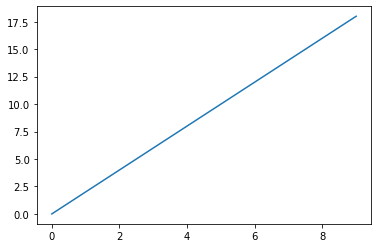

In [34]:
x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.show()

**Listing 2. 3. Plotting individual data-points**

Our plotted points have been connected using smooth line segments. We can visualize these points individually using the `plt.scatter` method.

> 绘制散点图

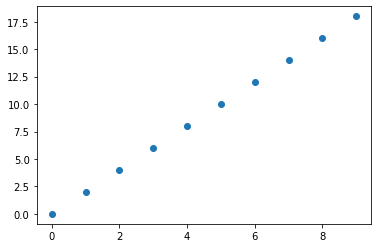

In [35]:
plt.scatter(x, y)
plt.show()

**Listing 2. 4. Shading an interval beneath a connected plot.**

Suppose we want to emphasize the interval where x begins at 2 and ends at 6. We do this by shading the area under the plotted curve over the specified interval, using the `plt.fill_between` method.

> 用`fill_between`函数圈出线形图的某个区间段

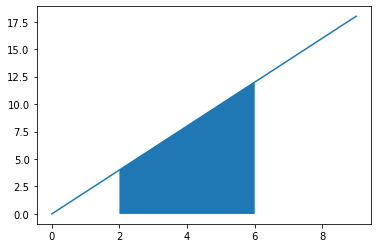

In [36]:
plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()

**Listing 2. 5. Exposing individual coordinates within a continuous plot**

Lets highlight an interval beneath a continuous line while also exposing individual coordinates.

> 线形图叠加散点图，并标记区间段

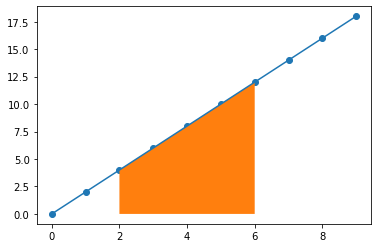

In [37]:
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show()

**Listing 2. 6. Adding axes labels.**

No data plot is ever truly complete without descriptive x-axis and y-axis labels. Such labels can be set using the `plt.xlabel` and `plt.ylabel` methods.

> 给坐标轴添加label

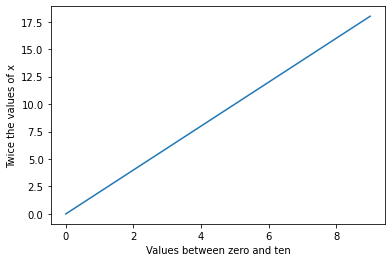

In [38]:
plt.plot(x, y)
plt.xlabel('Values between zero and ten')
plt.ylabel('Twice the values of x')
plt.show()

## 2.2. Plotting Coin-Flip Probabilities

**Listing 2. 7. Plotting the coin-flip weighted sample space**

Our aim is to compare the plotted data from `weighted_sample_space` and `weighted_sample_space_20_flips`. We will begin plotting the elements of `weighted_sample_space`. The x-axis will correspond to `'Head-count'`. The y-axis
will correspond to `'Number of coin-flip combinations with x heads'`.

> 绘制散点图，横坐标为样本空间，即10次抛硬币正面向上的次数，纵坐标为权重

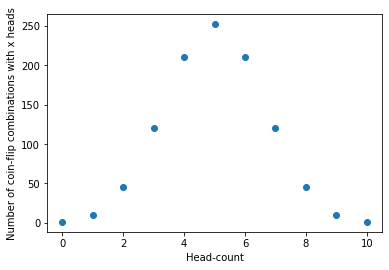

In [39]:
# 采样空间样本：即10次抛硬币正面次数综合=N
x_10_flips = list(weighted_sample_space.keys())
# 采样空间样本对应的权重：即抛10次硬币正面次数=N的抛硬币组合数
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
# 绘制散点图、横坐标纵坐标Label
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Number of coin-flip combinations with x heads')
plt.show()

**Listing 2. 8. Plotting the coin-flip probabilities**

Lets plot the probabilities directly on the y-axis. The probability plot will allow us to replace our lengthy y-axis label with a more concisely stated `'Probability'`.

> 绘制散点图，横坐标为样本空间，即10次抛硬币正面向上的次数，纵坐标为概率

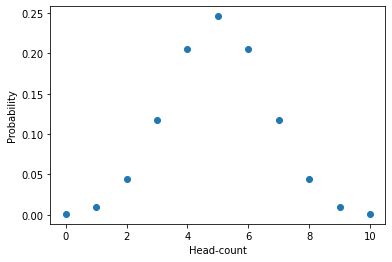

In [40]:
# 采样空间样本：即10次抛硬币正面次数综合=N
x_10_flips = list(weighted_sample_space.keys())
# 采样空间样本权重：即抛10次硬币正面次数=N的抛硬币组合数
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
# 总权重：即抛10次硬币，正反面向上总的组合数
sample_space_size = sum(weighted_sample_space.values())
# 概率 = 采样空间样本权重 / 总权重
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

**Listing 2. 9. Confirming that all probabilities sum to 1.0**

The mapping between x-values and probabilities is called a **probability distribution**. The total area beneath a
probability distribution always equals 1.0.

> 验证：样本空间各个样本概率之和为1

In [41]:
assert sum(prob_x_10_flips) == 1.0

**Listing 2. 10. Shading the interval under a probability curve**

The area beneath the head-count interval of 8 through 10 is equal to the probability of observing 8 heads or more. We can visualize that area using the `plt.fill_between method`. 

> 绘制正面向上次数在[8,10]之间的概率

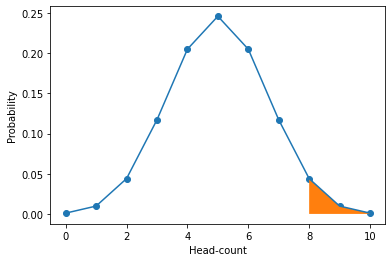

In [42]:
# 绘制折线
plt.plot(x_10_flips, prob_x_10_flips)
# 绘制散点
plt.scatter(x_10_flips, prob_x_10_flips)
# 绘制正面向上次数在[8,10]之间的概率
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
# 绘制Label
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

**Listing 2. 11. Shading the interval under the extremes of a probability curve**

Now, lets also the shade the interval demarcating the probability of observing 8 tails or more.

> 绘制正面向上次数在[0,2], [8,10]之间的概率

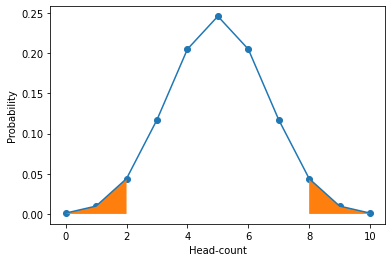

In [43]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

The two symmetrically shaded intervals cover the right and left tail-ends of the coin-flip curve.

### 2.2.1. Comparing Multiple Coin-Flip Probability Distributions

**Listing 2. 12. Computing probabilities for a 20 coin-flip distribution.**

Lets extend our plot to also encompass the distribution for 20 flipped coins. We’ll plot both distributions on a single figure, though first we must compute the x-axis head-counts and y-axis probabilities for the 20 coin-flip distribution.

> 计算投掷20次硬币，正面向上次数=N的概率

In [44]:
# 投掷20次硬币，正面向上的次数取值范围
x_20_flips = list(weighted_sample_space_20_flips.keys())
# 投掷20次硬币，正面向上的次数取值所对应的权重（正面向上次数=N时、各枚硬币向上的组合数）
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
# 投掷20次硬币，总权重（硬币向上的组合数）
sample_space_size = sum(weighted_sample_space_20_flips.values())
# 概率 = 次数为N的权重 / 总权重
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

**Listing 2. 13. Plotting 2 simultaneous distributions.**

Now we are ready to visualize the 2 distributions simultaneously.

> 抛10次硬币、与抛20次硬币绘制在一起，以做比较

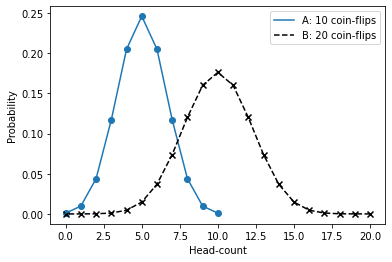

In [45]:
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.scatter(x_10_flips, prob_x_10_flips)
plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle='--',
        label='B: 20 coin-flips')
plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='x')
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.legend()
plt.show()

**Listing 2. 14. Highlighting intervals beneath 2 plotted distributions.**

We’ve visualized our 2 distributions. Next, we’ll proceed to highlight our interval of interest (80% of heads or tails) across each of the 2 plotted curves.

> 抛10次硬币、与抛20次硬币绘制在一起，以做比较，并标注出各自头尾部20%区间段的概率

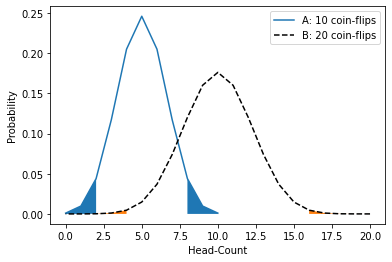

In [46]:
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_flips, prob_x_20_flips, color='k', linestyle='--', 
         label='B: 20 coin-flips')
plt.legend()

where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)

plt.xlabel('Head-Count')
plt.ylabel('Probability')
plt.show()

**Listing 2. 15. Converting head-counts into frequencies**

Lets improve the visualization by aligning the distribution peaks. If we convert the head-counts into frequencies (by
dividing by the total coin flips), then both the distribution peaks should align at a frequency of 0.5.

> 把横坐标由正面向上次数，转换成频率，将两条折线的X轴align在一起（但这样带来另一个问题，折线下面积不再是1，这个问题将在下一张图中解决）

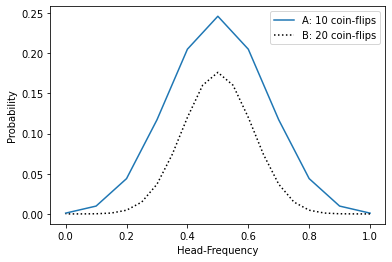

In [47]:
# 投掷10次筛子，正面向上次数[0,10]转换成频率[0.0,  1.0]
x_10_frequencies = [head_count / 10 for head_count in x_10_flips]

# 投掷20次筛子，正面向上次数[0,20]转换成频率[0.0,  1.0]
x_20_frequencies = [head_count / 20 for head_count in x_20_flips]

# 绘制两条折线图
plt.plot(x_10_frequencies, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, prob_x_20_flips, color='k', linestyle=':', label='B: 20 coin-flips')

# 图例
plt.legend()

# Label
plt.xlabel('Head-Frequency')
plt.ylabel('Probability')
plt.show()

**Listing 2. 16. Computing relative likelihoods of frequencies**

The 2 peaks now align. However, the total area beneath each curve no longer equals 1.0. We’ll need to force the aligned curve-areas to equal 1.0 prior to doing interval comparison. The adjusted y-values will no longer be probabilities. They will become **relative likelihoods*.

> 如何解决上一张图中，折线下面积不再为1的问题：方法是调整y值，对其进行拉伸，不再表示绝对概率，而是一个相对似然（`relative likelihoods`）<br/>
> 对于投10次硬币的样本空间：之前对X轴做了除以10的缩放，因此对Y轴做乘以10的缩放<br/>
> 对于投20次硬币的样本空间：之前对X轴做了除以20的缩放，因此对Y轴做乘以20的缩放<br/>

**Listing 2. 17. Plotting aligned relative likelihood curves**

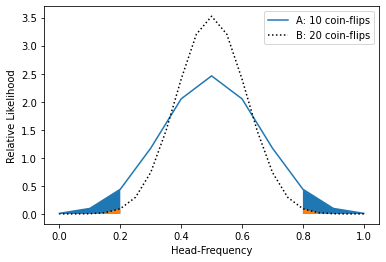

In [48]:
# 缩放之后的Y轴
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

# 重新绘制折线图
plt.plot(x_10_frequencies, relative_likelihood_10, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, relative_likelihood_20, color='k', linestyle=':', label='B: 20 coin-flips')

# 填充左右20% Frequencies的区间段
plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)

# 图例和Label
plt.legend()
plt.xlabel('Head-Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

Curve A covers a larger area over more extreme head-frequency intervals. Hence, observed recordings of such frequencies are more likely to occur when the coin-flip count is 10 and not 20.

# 3. Running Random Simulations in NumPy
## 3.1. Simulating Random Coin-Flips and Dice-Rolls Using NumPy

**Listing 3. 1. Importing NumPy**

Lets import the NumPy numerical computing library.

> 导入numpy

In [49]:
import numpy as np

**Listing 3. 2. Simulating a randomly rolled die**

We can carry out random simulations using the `np.random` module. Calling `np.random.randint(1, 7)` will simulate a single roll of a standard die.

> 用随机数来模拟骰子投掷

In [50]:
dice_roll = np.random.randint(1, 6)
assert 1 <= dice_roll <= 6

**Listing 3. 3. Seeding reproducible random dice-rolls**

We’ll need a way of ensuring that all our random outputs can be reproduced at home. Conveniently, consistency can easily be maintained by calling `np.random.seed(0)`.

> 通过固定随机数的seed，可以保证产生一个固定的伪随机数序列，使得筛子投掷模拟可以复现

In [51]:
np.random.seed(0)
dice_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert dice_rolls == [5, 6, 1]

**Listing 3. 4. Simulating one fair coin-flip**

We’ll now use np.random.randint(0, 2) to simulate a single flip of an unbiase
coin.

> 同样的方法可以模拟无偏的硬币投掷

In [52]:
np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


**Listing 3. 5. Simulating 10 fair coin-flips**

Next, we’ll simulate a sequence of 10 coin-flips, and then compute the observed frequency of heads.

> 模拟10次硬币投掷，然后计算正面向上的观测频率

In [53]:
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
    total_heads = sum(coin_flip_sequence)
    return total_heads / len(coin_flip_sequence)

# 10次随机硬币投掷
coin_flips = [np.random.randint(0, 2) for _ in range(10)]
# 计算正面向上次数占比（频率）
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


**Listing 3. 6. Plotting simulated fair coin-flip frequencies**

Lets see what happens when we flip the coin 1000 times. After each flip, we will record the total frequency of heads observed in the sequence. Once the coin-flips are completed, we will plot the results.

> 投掷1000次硬币，并且每次投掷后，计算到目前为止，正面向上的Frequency，并绘图</br>
> 可以看出，正面向上的Frequency再初期波动比较大，随着投掷次数的增加逐渐稳定在0.5附近</br>

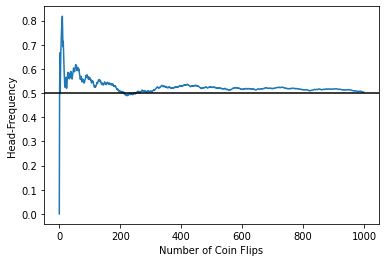

In [54]:
# 固定随机数seed
np.random.seed(0)

# 投掷硬币序列：第1次 -> 第1000次 
coin_flips = []
# 正面向上的Frequency
frequencies = []
# 从投掷第1次 -> 投掷了1000次
for _ in range(1000):
    # 投掷第i次硬币
    coin_flips.append(np.random.randint(0, 2))
    # 计算从投掷第1次、到第i次中，正面向上的Frequency
    frequencies.append(frequency_heads(coin_flips))

# 绘图
plt.plot(list(range(1000)), frequencies)
plt.axhline(.5, color='k')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-Frequency')
plt.show()

The probability of heads slowly converges to 0.5.

### 3.1.1. Analyzing Biased Coin-Flips

**Listing 3. 7. Simulating biased coin-flips**

Lets simulate a coin that falls on heads 70% of the time? We'll generate that biased output by calling `np.random.binomial(1, .7)`.

> 用`np.random.binomial(1, .7)`模拟正面向上概率为70%的有偏硬币投掷

In [55]:
# 固定Random Seed
np.random.seed(0)

# 用np.random.binomial(1, .7)生成正面向上概率为70%的有偏估计下的硬币投掷序列
print("Lets flip the biased coin once.")
coin_flip = np.random.binomial(1, .7)
print(f"Biased coin landed on {'heads' if coin_flip == 1 else 'tails'}.")

# 投掷10次硬币，发现其中有6次正面朝上
print("\nLets flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, .7)
print((f"{head_count} heads were observed out of " 
       f"{number_coin_flips} biased coin flips"))

Lets flip the biased coin once.
Biased coin landed on heads.

Lets flip the biased coin 10 times.
6 heads were observed out of 10 biased coin flips


Lets generate a sequence of 1000 biased coin-flips. We’ll then check if the frequency converges to 0.7.

**Listing 3. 8. Computing coin-flip frequency convergence**

In [56]:
# 投掷1000次，正面向上的Frequency已经达到了0.697（接近70%的概率值）
np.random.seed(0)
head_count = np.random.binomial(1000, .7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


**Listing 3. 9. Re-computing coin-flip frequency convergence**

The frequency is .03 units smaller than the true probability of heads. Suppose we recompute the frequency of 1000 coin-flips five more times. Will any of the frequencies be equal to 0.7? 

> 如果再来5轮1000次硬币，是否会出现Frequency=0.7的情况，运行下面的代码，5轮中有1轮Frequency为0.7，其余轮次Frequency在0.7上下波动

In [57]:
np.random.seed(0)
assert np.random.binomial(1000, .7) / 1000 == 0.697
for i in range(1, 6):
    head_count = np.random.binomial(1000, .7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency == 0.7:
        print("Frequency equals the probability!\n")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


Just one out the 5 iterations produced a measurement that equaled the real probability. The observed frequency appears to fluctuate over every sampling of 1000 coin-flips.

## 3.2. Computing Confidence Intervals Using Histograms and NumPy Arrays

**Listing 3. 10. Computing frequencies with 500 flips-per-sample**

We’ve previously sampled our coin over 5 iterations of 1000 coin-flips each. The sampling produced some fluctuations in the frequency. Lets explore these fluctuations by increasing our frequency count from 5 to 500.

> 将5轮1000次有偏硬币投掷，增加到500轮

In [58]:
np.random.seed(0)
head_count_list = [np.random.binomial(1000, .7) for _ in range(500)]

**Listing 3. 11. Optimizing coin-flip frequency computation**

We can more efficiently sample over 500 iterations by running `np.random.binomial(coin_flip_count, 0.7, size=500)`. 

> 将5轮1000次有偏硬币投掷，增加到500轮：另一种代码写法，会更加简洁

In [59]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

**Listing 3. 12. Coverting a NumPy array to a Python list**

The output is not a Python list, but a NumPy array data-structure. The actual numeric quantities stored
with both `head_count_array` and `head_count_list` remain the same.

> 将上面代码`np.random.binomial(1000, 0.7, 500)`的输出由Numpy Array（`ndarray` or `scalar`）转换为`list`

In [60]:
assert head_count_array.tolist() == head_count_list

**Listing 3. 13. Coverting a Python list to a NumPy array**

We can also convert our Python list into a value-equivalent NumPy array by calling np.array(head_count_list).

> 同样还可以把`list`转换回Numpy Array（`ndarray` or `scalar`）

In [61]:
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array) == True

**Listing 3. 14. Computing frequencies using NumPy**

Dividing a NumPy array by some number will automatically divide all array elements by that number. Thus, executing head_count_array / 1000 will automatically transform our head-counts into frequencies.

> 将这个`ndarray`中的元素（每轮正面向上的次数）除以1000（每轮投掷1000次），得到每轮正面向上的频率

In [62]:
# 元素除以1000
frequency_array = head_count_array / 1000

# 上面是numpy的运算，会作用在ndarray中每个元素上，等效于下面的代码
assert frequency_array.tolist() == [head_count / 1000 for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000,  head_count_list))

Lets explore the contents of `frequency_array` in greater detail. We’ll start by printing the first 20 sampled frequencies within the array.

**Listing 3. 15. Printing a NumPy frequency array**

In [63]:
# 打印前20轮正面向上的频率
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


Now, lets extract the minimum and maximum frequencies values by calling the `frequency_array.min()` and
`frequency_array.max()` array methods.

**Listing 3. 16. Finding the largest and smallest frequency values**

In [64]:
# 查看正面向上频率的最低值、最高值
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


Somewhere between the frequency range of 0.656 to 0.733 lies the true probability of
heads. How can we rationally narrow the frequency range? Plotting the data could help.

**Listing 3. 17. Plotting measured frequencies**

> 用散点图查看频率值所出现的轮数，但是散点图太分散，希望用柱状图按频率区间来统计

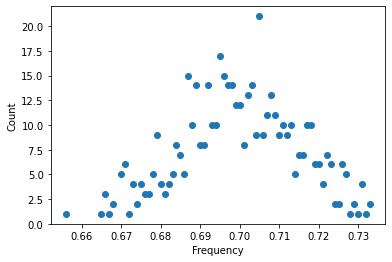

In [65]:
frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]
plt.scatter(frequencies, counts)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

Our plot is somewhat flawed, since values that are very close get counted separately. Perhaps instead of treating these values as individual points, we should group such proximate frequencies together.

### 3.2.1. Binning Similar Points in Histogram Plots

**Listing 3. 18. Plotting a frequency histogram using plt.hist**

We’ll sub-divide our frequency range into N equally spaced bins, and then place all frequency values into one of those bins.  Afterwards, we’ll count the total values in each bin, and visualize the counts using a plot. This type of **histogram** plot can be carried out using the `plt.hist` method.

> 用柱状图来统计各正面向上频率区间的实验轮数

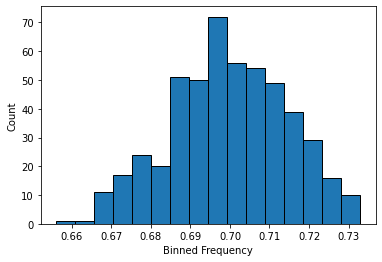

In [66]:
plt.hist(frequency_array, bins='auto', edgecolor='black')
plt.xlabel('Binned Frequency')
plt.ylabel('Count')
plt.show()

**Listing 3. 19. Counting bins in a plotted histogram**

The total count of bins within the plot is not yet known. However, we can obtain that information using `counts`, which is a NumPy array returned by `plt.hist`.

> 因为柱状图的柱子数是让`plt.hist`自己来选取的（`bins='auto'`），因此通过函数返回值来得到柱子数(`bin count`)

Number of Bins: 16


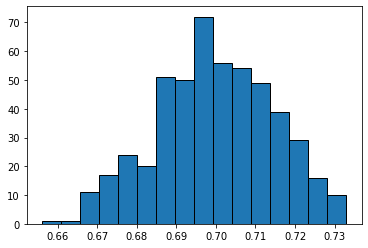

In [67]:
counts, _, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')
print(f"Number of Bins: {counts.size}")

**Listing 3. 20. Finding the width of bins within a histogram**

How wide is each bin? To find out, we'll leverage the `bin_edges` array, which is the second variable
returned by `plt.hist`.

> 同样，通过`plt.hist`返回值，可以得到每跟柱子所覆盖的x轴取值区间跨度

Bin width: 0.004812499999999997


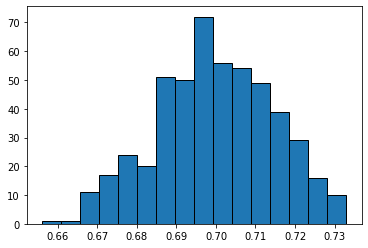

In [68]:
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')

bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

**Listing 3. 21. Getting a bin’s frequency and size**

The `bin_edges` array can be used in tandem with `counts` to output the element-count and
coverage-range for any specified bin. 

> 打印各根柱子的详情（柱子编号、X轴最低值、X轴最高值、覆盖的轮数（Y轴））

In [69]:
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains " 
           f"{count} element{'' if count == 1 else 's'}"))
    
output_bin_coverage(0)
output_bin_coverage(5)

The bin for frequency range 0.656 - 0.6608125 contains 1 element
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements


**Listing 3. 22. Finding the index of an array’s maximum value**

Let’s compute the count and frequency range for the highest peak within our histogram. Conveniently, NumPy arrays have a built-in `argmax` method, which returns the index of the maximum value within a given array.

> 找到Y值最高的那根柱子的编号

In [70]:
assert counts[counts.argmax()] == counts.max()

**Listing 3. 23. Using `argmax` to return a histogram’s peak**

Thus, calling `output_bin_coverage(counts.argmax())` should provide us with the output we’ve requested.

> 打印Y值最高的那根柱子的详细情况（柱子编号、X轴最低值、X轴最高值、覆盖的轮数（Y轴））

In [71]:
output_bin_coverage(counts.argmax())

The bin for frequency range 0.6945 - 0.6993125 contains 72 elements


### 3.2.2. Deriving Probabilities from Histograms

**Listing 3. 24. Plotting a histogram’s relative likelihoods**

We wish to calculate the likelihood that a randomly measured frequency falls within 0.694 - 0.699. The likelihood of an interval equals its area under a curve, but only when the total plotted area sums up to 1.0. We thus must modify our histogram by transforming the counts into relative likelihoods.

> 前面小节的图片，横坐标是1轮1000次投硬币实验正面向上的频率区间段，纵坐标是覆盖的轮数</br>
> 下面的代码，通过`density=True`参数，将纵坐标转换成轮数的相对`likelihoods`，进而使得所有柱体总面积是1.0</br>

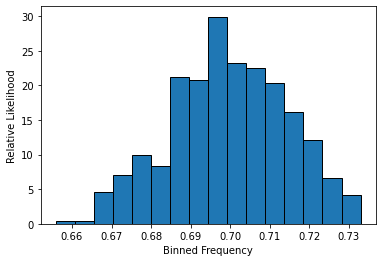

In [72]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

**Listing 3. 25. Computing the total area under a histogram**

The total area beneath our histogram now sums to 1.0.

> 验证，总面积为1.0

In [73]:
assert likelihoods.sum() * bin_width == 1.0

**Listing 3. 26. Computing the probability of the peak frequencies**

Thus, the area beneath the histogram’s peak is now a probability. We can compute that probability by calculating the area of the bin positioned at `likelihoods.argmax()`.

> 现在柱状图面积可以表示概率了，通过柱面下面积来计算一个X轴区间段的概率
> 
> 下面例子是Y值最高的柱子所覆盖的X轴区间，以及概率：为0.025

In [114]:
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.8459554054054055 - 0.8460490540540541 with probability 0.025610000000030362


**Listing 3. 27. Raising the probability of a frequency range**

The probability is low, but we can raise it by expanding our interval range beyond one bin. We’ll stretch the range to cover neighboring bins at `indices likelihoods.argmax() - 1` and `likelihoods.argmax() + 1`.

> 下面的例子计算3根柱子所覆盖的X轴区间段的总概率：为0.464

In [75]:
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


**Listing 3. 28. Computing a high confidence interval**

These three bins represent what statisticians call a 46.4% **confidence interval**. Ideally, we’d prefer a confidence interval of 95% or more. We’ll reach that confidence interval by iteratively expanding our left-most bin and right-most bin until the interval area stretches past 0.95.

> 现在X值(10次投硬币正面向上次数频率)落在[0.6896875,0.704125]的置信度为46.4%，仍然不够，我们通常希望置信度达到95%</br>
> 
> 下面代码：从概率最高的柱子开始、逐渐向两侧扩展，直到置信度达到95%</br>

In [76]:
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1

        area = likelihoods[start_index: end_index + 1].sum() * bin_width
    
    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"The frequency range {range_string} represents a "
           f"{100 * area:.2f}% confidence interval"))
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670438 - 0.723375 represents a 95.40% confidence interval


(3, 14)

From our analysis, we’re fairly confident that the true probability lies somewhere between 0.670 and 0.723.

### 3.2.3. Shrinking the Range of a High Confidence Interval

**Listing 3. 29. Sampling 100,000 frequencies**

How can we taper down our range while still maintaining a 95% confidence interval? Perhaps we should try elevating the frequency count from 500 to 100,000.

> 前面的代码中，得到的95%置信区间的X轴(1000次投硬币、正面向上的频率)的区间段为[0.670, 0.723]
> 
> 这个区间段仍然有点宽，如果我们想缩短这个区间段，还如何做的？
> 
> <b>将500轮1000次投硬币、改为10000轮</b>
> 
> 下面是代码

In [115]:
# 固定random seed
np.random.seed(0)
# 10000轮贝努力实验（投硬币），每轮投硬币1000次
head_count_array = np.random.binomial(1000, 0.7, 100000)
# 计算出每一轮正面向上的频率
frequency_array = head_count_array / 1000
# 一共有10000轮
assert frequency_array.size == 100000

**Listing 3. 30. Coloring histogram bars over an interval**

We will re-compute the histogram on the updated `frequency_array`. Afterwards, we’ll visualize that histogram while also searching for a high confidence interval. Lets incorporate the confidence interval into our visualization by coloring the histogram bars within its range.


The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval


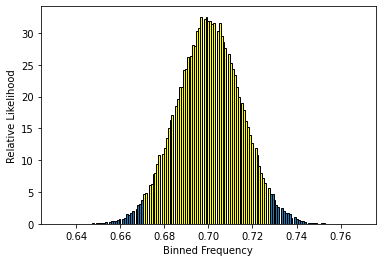

In [78]:
# 计算相对likelyhood以便让柱面下面积为1（density=True）
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
# 每根柱子的宽度
bin_width = bin_edges[1] - bin_edges[0]
# 用上面定义的函数，从最高的柱子开始逐渐向两侧扩展，直到达到95%的置信度
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

# 将95%置信度区间内的柱子标记为黄色
for i in range(start_index, end_index):
     patches[i].set_facecolor('yellow')

# X轴Y轴标签
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

**Listing 3. 31. Sampling 5 billion flipped coins**

The new frequency range is nearly identical to the one we saw before. Raising the sampling size
from 500 to 100,000 appears to have done little to reduce the range. Perhaps we should’ve also raised the number of coin-flips per frequency-sample.  Lets increase this value 50-fold to 50,000 coin-flips per sampled frequency.

> 前面的代码（将轮次由500轮改为10000轮），发现95%置信区间变化不大，效果不佳
>
> 这次我们尝试将每轮1000次投硬币、改为50000次投硬币，代码如下：

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


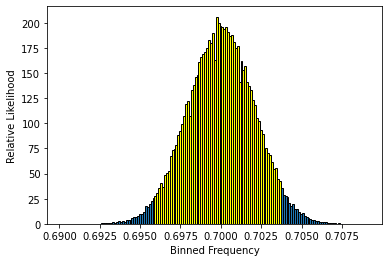

In [79]:
# 固定Random Seed
np.random.seed(0)
# 100000轮贝努力实验、每一轮投硬币50000次 
head_count_array = np.random.binomial(50000, 0.7, 100000)
# 每一轮正面向上的频率
frequency_array = head_count_array / 50000

# 计算轮数的相对likelyhood以便让柱面下面积为1（density=True）
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
# 计算柱子宽度
bin_width = bin_edges[1] - bin_edges[0]
# 计算95%置信区间下，X轴（1轮实验中正面向上频率）所在的区间段
# 用前面定义的函数，从轮数（Y轴、轮数的相对likelyhood）最高的柱子开始，逐渐向两侧扩展，直到置信度达到95%
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

# 95%置信区间的柱子标记为黄色
for i in range(start_index, end_index):
     patches[i].set_facecolor('yellow')
        
# 坐标轴Label
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

The new 95.06% confidence interval covers a frequency range of roughly 0.695 - 0.703. We are thus exceedingly confident that our true probability is approximately 0.70.

> 这次X轴95%置信度区间段由之前的 [0.670, 0.728] 缩小为 [0.695, 0.703]

### 3.2.4. Computing Histograms in NumPy

**Listing 3. 32. Computing a histogram using `np.histogram`**

Calling the `plt.hist` method will automatically generate a histogram plot. Can we obtain the histogram likelihoods and bin-edges without creating a plot? Yes; we simply need to call `np.histogram.`

> `plt.hist`会绘一张柱状图，如果不需要柱状图，可以使用`np.histogram.`，下面是例子

In [116]:
# 固定随机数seed
np.random.seed(0)
# 用`np.histogram`计算实验正面向上频率所覆盖轮次的相对likehoods（density=True，为了使柱面下面积为1）
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)
# 计算柱子宽度
bin_width = bin_edges[1] - bin_edges[0]
# 计算95%置信区间下，正面向上频率的区间段
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval


(46, 113)

## 3.3. Leveraging Confidence Intervals to Analyze a Biased Deck of Cards

**Listing 3. 33,34. Generating a random red and black card count**

Lets model a deck containing a hidden quantity of red cards. The total size of that deck is 52. The number of red cards in the deck is some unknown integer between zero and 52. We'll generate that integer using the `np.random.randint` method.

> 回到CaseStudy开头的纸牌问题，生成随机数`red_card_count`，`black_card_count`代表红牌、黑牌的数量
> 
> 他们的和为52，并且我们不希望两种牌的数量相等，这样可以演示有偏估计的使用

In [120]:
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1) # red_card_count: [0, 52]之间的一个随机数
black_card_count = total_cards - red_card_count # black_card_count:  52 - red_card_count
assert black_card_count != red_card_count # 不希望两种牌的数量相等，这样可以演示有偏估计的使用

**Listing 3. 35. Computing card probabilities using a sample space**

What is the probability that the first card will be red? Well, our card deck is biased, and the outcomes are not equally likely. Thus, a weighted sample space dictionary is required to compute the probability.

> 用红、黑卡牌数量作为权重，构造带权重的`样本空间`（`Sample Space`）
> 
> 计算`事件条件`（`Event Condition`）红色卡牌的概率

In [119]:
weighted_sample_space = {
                                     'red_card': red_card_count, 
                                     'black_card': black_card_count}
prob_red = compute_event_probability(
                                     lambda x: x == 'red_card',
                                     weighted_sample_space)
print(prob_red)

0.8461538461538461


**Listing 3. 36. Computing card probabilities using division**

Also, we can easily show that the probability of drawing a red card is equal to `red_card_count` divided by `total_cards`.

> 检查：该概率值与卡牌数占比相同

In [84]:
assert prob_red == red_card_count / total_cards

**Listing 3. 37. Simulating a random card**

We'll utilize `prob_red` to model a flipped-over first card using the Binomial distribution.

> 得到了卡牌是红色的概率，就可以模拟单重贝努力试验（抽取1张卡牌）

In [85]:
np.random.seed(0)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print(f"The first card in the shuffled deck is {color}")

The first card in the shuffled deck is red


**Listing 3. 38. Simulating 10 random cards**

We’ll proceed to shuffle the deck 10 times, and flip over the first card after each shuffle.

> 模拟10重贝努力试验（抽取10张卡牌），其中有8次是红牌

In [86]:
np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f"In {red_count} of out 10 shuffles, a red card came up first.")

In 8 of out 10 shuffles, a red card came up first.


**Listing 3. 39. Computing card-probability confidence intervals**

Lets now shuffle now shuffle the deck 50,000 times. Afterwards, lets compute the frequency and then re-do the shuffling procedure another 100,000 times. We use the resulting frequencies to compute a 95% confidence interval for flipping over a red card.

> 洗牌50000次，计算Frequency；如此重复100000次；计算95%置信度下、抽到红牌的概率区间段

In [87]:
# 固定Radom Seed
np.random.seed(0)

# 100000轮贝努力实验，每轮抽取卡牌50000次
red_card_count_array = np.random.binomial(50000, prob_red, 100000) 

# 每一轮红色卡牌的频率 = 红色卡牌数量 / 抽取总次数
frequency_array = red_card_count_array / 50000

# 计算Y轴的相对Likelyhoods（频率跨度所覆盖红牌数量的相对Likehoods值），柱体在X轴的区间跨度（一轮抽取中抽到红牌的频率跨度）
# 将覆盖轮数转成相对Likelyhoods，可以使得柱状图总面积为1.0
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', 
                                      density=True)
bin_width = bin_edges[1] - bin_edges[0]

# 计算95%置信度下，X轴的区间跨度
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width) 

The frequency range 0.842865 - 0.849139 represents a 95.16% confidence interval


**Listing 3. 40. Estimating the red card count**

We are highly confident that red_card_count lies between `0.842865 * total_cards` and `0.849139 *
total_cards`. Let’s compute the likely range of `red_card_count`.

> 根据相对LikeHoods计算红牌数量，为44

In [88]:
range_start = round(0.842865 * total_cards)
range_end = round(0.849139 * total_cards)
print(f"The number of red cards in the deck is between {range_start} and {range_end}")

The number of red cards in the deck is between 44 and 44


**Listing 3. 41. Validating the red card count**

We are very confident that there are 44 red cards in the deck. Lets check if our solution is
correct.

In [121]:
if red_card_count == 44:
    print('We are correct! There are 44 red cards in the deck')
else:
    print('Oops! Our sampling estimation was wrong.')

We are correct! There are 44 red cards in the deck


## 3.4. Using Permutations to Shuffle Cards

**Listing 3. 42. Shuffling a 4-card deck**

Card-shuffling requires us to randomly re-order the elements of a card-deck. That random
re-ordering can be carried out using the `np.random.shuffle` method.

> 通过`np.random.shuffle`来洗牌（会更改原`ndarray`）

In [90]:
np.random.seed(0)
card_deck = [1, 1, 0, 0]
np.random.shuffle(card_deck)
print(card_deck)

[0, 0, 1, 1]


If we prefer to carry out the shuffle while retaining a copy of the original unshuffled deck, we can do so using
`np.random.permutation`.

**Listing 3. 43. Returning a copy of the shuffled deck**

> 通过`np.random.permutation`来返回一个洗牌后的`ndarray`（原`ndarray`保持不变）

In [91]:
np.random.seed(0)
unshuffled_deck = [1, 1, 0, 0]
shuffled_deck = np.random.permutation(unshuffled_deck)
assert unshuffled_deck == [1, 1, 0, 0]
print(shuffled_deck)

[0 0 1 1]


**Listing 3. 44. Iterating over card permutations**

The random ordering of elements returned by `np.random.permutation` is mathematically called a **permutation**. Calling `itertools.permutations(unshuffled_deck)` will return an iterable over every possible permutation of the deck.

> 用`itertools.permutations(unshuffled_deck)`来遍历各种可能的排列

In [92]:
import itertools
for permutation in list(itertools.permutations(unshuffled_deck))[:3]:
    print(permutation)

(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)


**Listing 3. 45. Monitoring permutation swaps**

The first 2 generated permutations are identical to each other, because identical zeros were swapped by the permutation function. We can confirm the swap actually took place by examining the first three permutations of [0, 1, 2, 3].

> 换一个输入[0,1,2,3]来解释之前输入[1,1,0,0]时为何返回的前两个排列是重复的

In [93]:
for permutation in list(itertools.permutations([0, 1, 2, 3]))[:3]:
    print(permutation)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)


**Listing 3. 46. Computing permutation counts**

Certain permutations of the 4-card deck occur more than once.  Let’s store these permutation counts within a `weighted_sample_space` dictionary.

> 用每种排列出现的次数作为权重，来构造一个各种排列的`带权重的样本空间`（`Weighted Sample Space`）

In [94]:
weighted_sample_space = defaultdict(int)
for permutation in itertools.permutations(unshuffled_deck):
    weighted_sample_space[permutation] += 1

for permutation, count in weighted_sample_space.items():
    print(f"Permutation {permutation} occurs {count} times")

Permutation (1, 1, 0, 0) occurs 4 times
Permutation (1, 0, 1, 0) occurs 4 times
Permutation (1, 0, 0, 1) occurs 4 times
Permutation (0, 1, 1, 0) occurs 4 times
Permutation (0, 1, 0, 1) occurs 4 times
Permutation (0, 0, 1, 1) occurs 4 times


All the permutations occur with equal frequency. Consequently, an unweighted sample space should be sufficient to compute permutation probabilities.

> 发现各种排列出现的次数都相同 ，因此用无权重的样本空间已经足够；下面计算每种排列的出现概率，为0.16666666666666666

In [95]:
sample_space = set(itertools.permutations(unshuffled_deck)) 
event_condition = lambda x: list(x) == unshuffled_deck 
prob = compute_event_probability(event_condition, sample_space) 
assert prob == 1 / len(sample_space)
print(f"Probability that a shuffle does not alter the deck is {prob}")

Probability that a shuffle does not alter the deck is 0.16666666666666666


**Listing 3. 48. Computing a 10-card sample space**

We can compute probabilities directly from the unweighted sample. Unfortunately, creating this sample space is not feasible for a deck of 52 cards. However, such a sample space could easily be computed for smaller deck of size 10.

> 52张排各种排列的样本空间计算量巨大很难计算，但是10张牌还是可以计算

In [96]:
red_cards = 5 * [1]
black_cards = 5 * [0]
unshuffled_deck = red_cards + black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
print(f"Sample space for a 10-card deck contains {len(sample_space)} elements")

Sample space for a 10-card deck contains 252 elements


# 4. Case Study 1 Solution
##  4.1. Overview
Our aim is to play a card-game in which the cards are iteratively flipped until we tell the
dealer to stop. Afterwards, one additional card is flipped. If that card is red, we win a dollar.
Otherwise, we lose a dollar.

> 游戏规则：
> 
> 52张纸牌、一半红牌一半黑牌。</br>
> 每一轮游戏中：</br>
> (1) 洗牌，洗牌之后牌背面向上</br>
> (2) 对方一次翻开一张牌，我方可以决定是否停止。</br>
> (3) 当我方喊停后，对方最后一次翻牌：翻开的牌是红色，我方赢1美元；翻开的牌是黑色，我方输1美元。</br>
> 结算筹码后游戏进入下一轮</br>
>
> 该游戏可以玩任意多轮，我方的最佳策略是什么？


## 4.2. Predicting Red Cards within a Shuffled Deck
We’ll start by creating a deck holding 26 red cards and 26 black cards. Black cards are
represented by zeroes and red cards are represented by ones.

> 先从红牌黑牌数量相等的情况开始（26张红牌、26张黑牌）

**Listing 4. 1. Modeling a 52-card deck**

> 初始化52张牌，26红、26黑

In [97]:
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards

We’ll proceed to shuffle the deck.

**Listing 4. 2. Shuffling a 52-card deck**

> 洗牌

In [98]:
np.random.seed(0)
shuffled_deck = np.random.permutation(unshuffled_deck)

**Listing 4. 3. Coding a card-game strategy**

Now we’ll iteratively flip over the cards within the deck, stopping when the the number of red cards remaining in the deck is greater than the number of black cards remaining in the deck.

> 游戏策略1：依次让对方翻开桌面的牌，直到下一张红牌概率大于0.5时喊停

In [124]:
# 剩余红牌数初始值26
remaining_red_cards = 26
# 每次翻开一张牌
for i, card in enumerate(shuffled_deck[:-1]):
    # 如果card=1（1为红牌，0为黑牌），剩余红牌数减1
    remaining_red_cards -= card
    # 剩余总牌数减1
    remaining_total_cards = 52 - i
    # 剩余红牌数 / 剩余总拍数 > 0.5时喊停
    if remaining_red_cards / remaining_total_cards > 0.5:
        break

print(f"Stopping the game at index {i}.")
final_card = shuffled_deck[i + 1]
color = 'red' if final_card else 0
print(f"The next card in the deck is {'red' if final_card else 'black'}.")
print(f"We have {'won' if final_card else 'lost'}!")

Stopping the game at index 1.
The next card in the deck is red.
We have won!


**Listing 4. 4. Generalizing the card-game strategy**

The strategy yielded a win on our very first try. Lets generalize this strategy to halt when the
fraction of remaining red cards is greater than an inputted `min_red_fraction` parameter.

> 游戏策略2：对策略1进行扩展，依次让对方翻开桌面的牌，当下一张红牌概率大于阈值`min_red_fraction`时喊停

In [125]:
# 固定Random Seed
np.random.seed(0)

# 总牌数52，总红牌数26
total_cards = 52
total_red_cards = 26

# 函数封装：
# min_fraction_red： 红牌概率阈值
# shuffled_deck：指定洗牌后的卡牌，为None时函数来洗牌
# return_index: 为True时返回(next_index, next_card)，为False时返回next_card
def execute_strategy(min_fraction_red=0.5, shuffled_deck=None, return_index=False):
    # 洗牌后的卡牌
    if shuffled_deck is None:
        shuffled_deck = np.random.permutation(unshuffled_deck) 
    # 剩余的红牌数
    remaining_red_cards = total_red_cards
    # 每次翻开一张牌
    for i, card in enumerate(shuffled_deck[:-1]):
        # 如果是红牌(card=1)、剩余红牌数减一
        remaining_red_cards -= card
        # 剩余红牌占总牌数的比例
        fraction_red_cards = remaining_red_cards / (total_cards - i)
        # 剩余红牌大于阈值时停止翻牌
        if fraction_red_cards > min_fraction_red:
            break
    # 返回
    return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1] 

### 4.2.1. Estimating the Probability of Strategy Success

**Listing 4. 5. Running strategy over 1000 shuffles**

Lets apply our basic strategy to a series of 1000 random shuffles.

> 将上面的游戏策略用在1000轮游戏上

In [101]:
# 执行`execute_strategy()`会得到喊停后，翻出的下一张牌，是红牌则我方胜，否则对方胜
observations = np.array([execute_strategy() for _ in range(1000)])

**Listing 4. 6. Computing the frequency of wins**

The total fraction of ones in observations corresponds to the observed fraction of red cards, and therefore to the fraction of wins. We can compute this fraction by calling `observations.mean()`.

> 计算1000轮游戏中，我方获胜的频率，即获胜轮数/总轮数

In [102]:
frequency_wins = observations.sum() / 1000
assert frequency_wins == observations.mean()
print(f"The frequency of wins is {frequency_wins}")

The frequency of wins is 0.524


**Listing 4. 7. Computing total profit**

We’ve won 52.4 percent of total games! Our strategy appears to be working. 524 wins and 76 losses will net us a total profit of $48.

> 计算总的利润：获胜赢得的金额 - 失败输掉的金额 
> 
> 每轮获胜赢1美元，失败输1美元

In [103]:
dollars_won = frequency_wins * 1000
dollars_lost = (1 - frequency_wins) * 1000
total_profit = dollars_won - dollars_lost
print(f"Total profit is ${total_profit}")

Total profit is $48.0


**Listing 4. 8. Plotting simulated frequencies of wins**

The strategy worked well for a sample size of 1000 shuffles. We’ll now plot the strategy’s win-frequency convergence over a series of sample sizes ranging from 1 to 10,000.

> 之前是在1000轮游戏上做演示，接下来plot从1轮游戏到10000轮游戏，获胜概率是如何收敛的

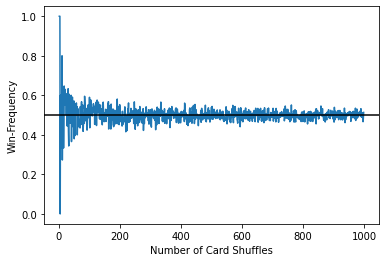

The win-frequency for 10,000 shuffles is 0.5135135135135135


In [104]:
np.random.seed(0)
def repeat_game(number_repeats):
    observations = np.array([execute_strategy()
                             for _ in range(number_repeats)])
    return observations.mean()

frequencies = []
for i in range(1, 1000):
    frequencies.append(repeat_game(i))

plt.plot(list(range(1, 1000)), frequencies)
plt.axhline(.5, color='k')
plt.xlabel('Number of Card Shuffles')
plt.ylabel('Win-Frequency')
plt.show()
print(f"The win-frequency for 10,000 shuffles is {frequencies[-1]}")

Our strategy fluctuates above and below 50% through-out the entire sampling process. We'll need to compute a confidence interval to ensure that its win-rate is above 50%. We’ll compute the confidence interval by sampling 10,000 card-shuffles 300 times. Shuffling an array is a computationally expensive procedure. **The code below will take approximately 40 seconds to run. Hence, it has been commented out.**

**Listing 4. 9. Computing the confidence interval for 3 million shuffles**

The frequency range 0.488687 - 0.510275 represents a 96.67% confidence interval


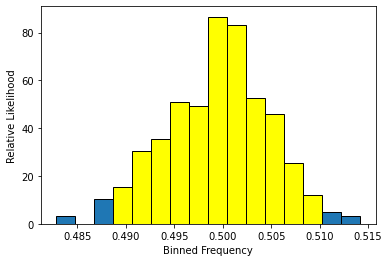

In [123]:
"""
np.random.seed(0)
frequency_array = np.array([repeat_game(10000) for _ in range(300)])

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
                                           edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
     patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()
"""

We can narrow the confidence interval by increasing the sample size, at the expense of running time. The code below will sample 50,000 shuffles over 3,000 iterations. **The code will take approximately one hour to run. Hence, it has been commented out.**

**Listing 4. 10. Computing the confidence interval for 150 million shuffles**

In [122]:
"""
np.random.seed(0)

frequency_array = np.array([repeat_game(50000) for _ in range(3000)])
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
                                      density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)
"""

"\nnp.random.seed(0)\n\nfrequency_array = np.array([repeat_game(50000) for _ in range(3000)])\nlikelihoods, bin_edges = np.histogram(frequency_array, bins='auto',\n                                      density=True)\nbin_width = bin_edges[1] - bin_edges[0]\ncompute_high_confidence_interval(likelihoods, bin_width)\n"

We can also `min_red_fraction` from 0.5 to 0.75 and repeat the confidence interval calculation process. **As before, the code will take approximately one hour to run. Hence, it has been commented out.**

**Listing 4. 11. Computing the confidence interval for an updated strategy**

In [107]:
"""
np.random.seed(0)
def repeat_game(number_repeats, min_red_fraction):
    observations = np.array([execute_strategy(min_red_fraction)
                            for _ in range(number_repeats)])
    return observations.mean()

frequency_array = np.array([repeat_game(50000, 0.75) for _ in range(3000)])
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
                                      density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)
"""

"\nnp.random.seed(0)\ndef repeat_game(number_repeats, min_red_fraction):\n    observations = np.array([execute_strategy(min_red_fraction)\n                            for _ in range(number_repeats)])\n    return observations.mean()\n\nfrequency_array = np.array([repeat_game(50000, 0.75) for _ in range(3000)])\nlikelihoods, bin_edges = np.histogram(frequency_array, bins='auto',\n                                      density=True)\nbin_width = bin_edges[1] - bin_edges[0]\ncompute_high_confidence_interval(likelihoods, bin_width)\n"

## 4.3. Optimizing Strategies using the Sample Space for a 10-Card Deck
The code below computes the sample space for a 10-card deck. Afterwards, it applies our
basic strategy to that sample space. Its output is the probability of a win.

**Listing 4. 12. Applying a basic strategy to a 10-card deck**

In [108]:
total_cards = 10
total_red_cards = int(total_cards / 2)
total_black_cards = total_red_cards
unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
win_condition = lambda x: execute_strategy(shuffled_deck=np.array(x)) 
prob_win = compute_event_probability(win_condition, sample_space)
print(f"Probability of a win is {prob_win}")

Probability of a win is 0.5


Surprisingly, our basic strategy yields a win only 50% of the time. Lets compute the win-probabilities over a range
of min_red_fraction values.

**Listing 4. 13. Applying multiple strategies to a 10-card deck**

In [109]:
def scan_strategies():
    fractions = [value / 100 for value in range(50, 100)]
    probabilities = []
    for frac in fractions:
        win_condition = lambda x: execute_strategy(frac,
                                                   shuffled_deck=np.array(x))
        probabilities.append(compute_event_probability(win_condition,
                                                       sample_space))
    return probabilities

probabilities = scan_strategies()
print(f"Lowest probability of win is {min(probabilities)}")
print(f"Highest probability of win is {max(probabilities)}")

Lowest probability of win is 0.5
Highest probability of win is 0.5


Both the lowest and highest probabilities are equal to 0.5! Perhaps adjusting the deck size will yield some
improvement. Let’s analyze the sample spaces of decks containing 2, 4, 6, and 8 cards.

**Listing 4. 14. Applying multiple strategies to multiple decks**

In [110]:
for total_cards in [2, 4, 6, 8]:
    total_red_cards = int(total_cards / 2)
    total_black_cards = total_red_cards
    unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards

    sample_space = set(itertools.permutations(unshuffled_deck))
    probabilities = scan_strategies()
    if all(prob == 0.5 for prob in probabilities):
        print(f"No winning strategy found for deck of size {total_cards}")
    else:
        print(f"Winning strategy found for deck of size {total_cards}")

No winning strategy found for deck of size 2
No winning strategy found for deck of size 4
No winning strategy found for deck of size 6
No winning strategy found for deck of size 8


All of the strategies yield a probability of 0.5 across the small decks. Our strategies don’t work on a 10-card deck, and we have little reason to believe that they will work on a 52-card deck. To better understand why this is the case, we can re-run our simulations over a 52 card deck while plotting wins and losses relative to halting and non-halting scenarios.

**Listing 4. 15. Plotting strategy outcomes across a 52-card deck**

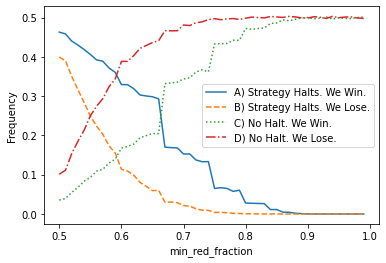

In [111]:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
unshuffled_deck = red_cards + black_cards

def repeat_game_detailed(number_repeats, min_red_fraction):

    observations = [execute_strategy(min_red_fraction, return_index=True)
                    for _ in range(num_repeats)] 
    successes = [index for index, card, in observations if card == 1] 
    halt_success = len([index for index in successes if index != 51]) 
    no_halt_success = len(successes) - halt_success 

    failures = [index for index, card, in observations if card == 0] 
    halt_failure = len([index for index in failures if index != 51]) 
    no_halt_failure = len(failures) - halt_failure 
    result = [halt_success, halt_failure, no_halt_success, no_halt_failure]
    return [r / number_repeats for r in result] 

fractions = [value / 100 for value in range(50, 100)]
num_repeats = 50000
result_types = [[], [], [], []]

for fraction in fractions: 
    result = repeat_game_detailed(num_repeats, fraction)
    for i in range(4):
        result_types[i].append(result[i])

plt.plot(fractions, result_types[0],
         label='A) Strategy Halts. We Win.')
plt.plot(fractions, result_types[1], linestyle='--',
         label='B) Strategy Halts. We Lose.')
plt.plot(fractions, result_types[2], linestyle=':',
         label='C) No Halt. We Win.')
plt.plot(fractions, result_types[3], linestyle='-.',
         label='D) No Halt. We Lose.')
plt.xlabel('min_red_fraction')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The added frequencies of Scenarios A and B appear to fluctuate at around 0.5. No matter what we do, our likelihood of winning remains 50-50. Therefore, the most optimal strategy we can offer is to pick the first card in the shuffled deck.

**Listing 4. 16. The most optimal winning strategy**

In [112]:
def optimal_strategy(shuffled_deck):
    return shuffled_deck[0]